# Определение перспективного тарифа для телеком компании

In [1]:
import pandas as pd

In [2]:
# Загрузка файлов 

datasets = ['calls', 'internet', 'messages', 'tariffs', 'users']
dfs = {}
for dataset in datasets:
    dfs[dataset] = pd.read_csv('datasets/' + dataset + '.csv')

In [3]:
print('{:10} {:>7} {:>12}'.format('Датасет', 'Колонок', 'Строк'))
for name, df in dfs.items(): #возвращает пары (ключ, значение)
    print('{:10} {:7} {:12}'.format(name, df.shape[1], df.shape[0]))

Датасет    Колонок        Строк
calls            4       202607
internet         4       149396
messages         3       123036
tariffs          8            2
users            8          500


Пустых фреймов нет. Число строк в tariffs и users соответствует описанию. Число строк в остальных датасетах значительное - соответствует целям анализа.

In [4]:
for key, value in dfs.items():
    print(' ' + '-' * len(key))
    print('|' + key + '|')
    print(' ' + '-' * len(key))
    print(value.info())
    print()

 -----
|calls|
 -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None

 --------
|internet|
 --------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 4.6+ MB
None

 --------
|messages|
 --------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 

## Предобработка данных

In [2]:
#здесь должна была быть фукнция предобработки

In [9]:
dfs_calls = dfs['calls']
dfs_calls['call_date'] = pd.to_datetime(dfs_calls['call_date'], format="%Y-%m-%d")

dfs_calls['is_missed'] = np.where(dfs_calls['duration'] == 0, True, False)

dfs_calls['duration'] = np.ceil(dfs_calls['duration']).astype('int64')

## Объединение таблиц

In [ ]:
data = calls.merge(messages, on=['user_id', 'month'], how='outer')
data = data.merge(internet, on=['user_id', 'month'], how='outer')
data = data.merge(users[['user_id', 'tariff', 'city']], on='user_id', how='left')
data = data.fillna(0).astype(int)

## Исследование данных

In [25]:
print('**************DECRIPTION OF TARIFF SMART**************')
display(data.query('tariff == "smart"')[['duration_calls', 'amount_messages', 'gb_used' ]].describe())
print()
print('**************DECRIPTION OF TARIFF ULTRA**************')
display(data.query('tariff == "ultra"')[['duration_calls', 'amount_messages', 'gb_used' ]].describe())

print('**************DISPERSIONS**************')
print('Smart:')
display(np.var(data.query('tariff == "smart"')[['duration_calls', 'amount_messages', 'gb_used' ]]))
print('Ultra:')
display(np.var(data.query('tariff == "ultra"')[['duration_calls', 'amount_messages', 'gb_used' ]]))

**************DECRIPTION OF TARIFF SMART**************


,duration_calls,amount_messages,gb_used
count,2229.000000,2229.000000,2229.000000
mean,417.934948,33.384029,16.359354
std,190.313730,28.227876,5.758498
min,0.000000,0.000000,0.000000
25%,282.000000,10.000000,13.000000
50%,422.000000,28.000000,17.000000
75%,545.000000,51.000000,20.000000
max,1435.000000,143.000000,38.000000



**************DECRIPTION OF TARIFF ULTRA**************


,duration_calls,amount_messages,gb_used
count,985.000000,985.000000,985.000000
mean,526.623350,49.363452,19.525888
std,317.606098,47.804457,9.865848
min,0.000000,0.000000,0.000000
25%,284.000000,6.000000,12.000000
50%,518.000000,38.000000,19.000000
75%,752.000000,79.000000,27.000000
max,1673.000000,224.000000,49.000000


**************DISPERSIONS**************
Smart:


duration_calls     36203.066652
amount_messages      796.455483
gb_used               33.145427
dtype: float64

Ultra:


duration_calls     100771.223617
amount_messages      2282.946075
gb_used                97.236132
dtype: float64

<b> Вывод: </b>

1) Результат метода describe говорит о том, что для обоих тарифов среднее арифметическое (mean) практически равно медиане (50%), что говорит об отсутствии больших аномальных выбросах в данных. Только для тарифа ультра заметно отличаются среднее и медиана сообщений.

2) Для всех трех рассчитываемых параемтров среднее у тарифа ультра больше, чем у тарифа смарт, что логично, ведь тариф ультра дороже и пакеты в нем больше.

3) Среднеквадратичные отклонения сильно отличаются (больше, чем на 5%).

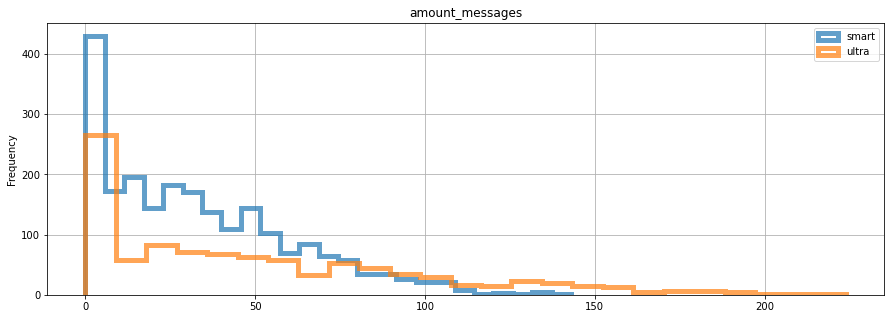

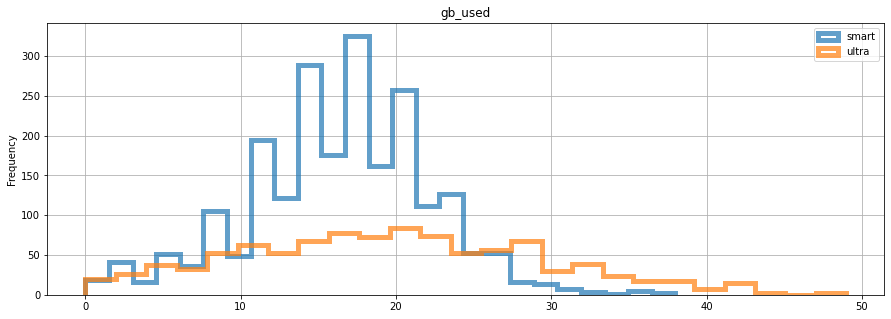

In [30]:
smart_month_stat = data[data['tariff'] == 'smart']
ultra_month_stat = data[data['tariff'] == 'ultra']
columns = ['amount_messages', 'gb_used']
for column in columns:
    ax = smart_month_stat[column].plot(title=column, kind='hist', histtype='step', label='smart', bins=25, 
            y=column, linewidth=5, alpha=0.7, figsize=(15,5), legend=True)
    ultra_month_stat[column].plot(ax=ax, kind='hist', histtype='step', label='ultra', bins=25, 
            y=column, linewidth=5, alpha=0.7, grid=True, legend=True)
    plt.show()

# Проверка гипотез

#### Гипотеза 1
Были сформулированы следующие гипотезы: 

H0: средняя выручка пользователей тарифов «Ультра» **равна** средней выручке пользователей тарифов «Смарт»

H1: средняя выручка пользователей тарифов «Ультра» **не равна** средней выручке пользователей тарифов «Смарт»
